In [157]:
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
from sklearn import preprocessing  

In [158]:
from warnings import filterwarnings
filterwarnings('ignore')

In [159]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [160]:
df = data.loc[(data['native-country'] != '?') & (data['workclass'] != '?') & (data['occupation'] != '?')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [183]:
# Если пройтись по всем признакам, то можем увидеть одинаковую тенденцию, людей получающих <=50К, в 99% случаях, больше 
# чем людей получающих >50К. 
dt1 = df[['workclass','income']][df['income']=='>50K'].groupby('workclass').count()
dt1['income2'] = df[['workclass','income']][df['income']=='<=50K'].groupby('workclass').count()
dt1

,income,income2
workclass,,
Federal-gov,549,857
Local-gov,915,2185
Private,7251,26056
Self-emp-inc,912,734
Self-emp-not-inc,1059,2737
State-gov,520,1426
Without-pay,2,19


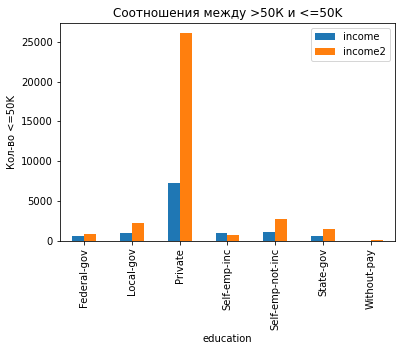

In [199]:
dt1.plot(kind = 'bar', title = 'Соотношения между >50К и <=50K',
                      xlabel = 'education', ylabel = 'Кол-во <=50K')
plt.show()


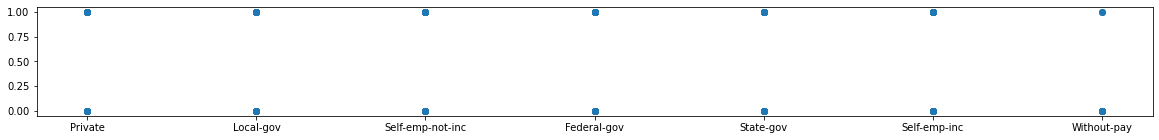

In [214]:
# Какую бы зависимость мы не выбрали, можно увидеть что у любого признака есть как люди с <=50K, так и >50K.
plt.figure(figsize=(20,2))
plt.scatter(df['workclass'], df['income'])
#plt.scatter(df['education'], df['income'])
#plt.scatter(df['hours-per-week'], df['income'])

In [184]:
my_label = preprocessing.LabelEncoder()  
df[ 'income' ]= my_label.fit_transform(df[ 'income' ])  
df['income']

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int32

In [185]:
# Для построения модели, выберем сразу несколько признаков, на мой взгляд наиболее значимые.

X = pd.get_dummies(df.loc[:,['workclass','education','occupation']])
y = df['income']
X

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(preprocessing.StandardScaler(),LogisticRegression(max_iter = 1000))

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [188]:
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [193]:
model.score(X_train, y_train)

0.7805511789258368

In [194]:
model.score(X_test, y_test)

0.7852957435046988

In [195]:
# Сделаем все тоже самое с помощью метода опорных векторов.
from sklearn.svm import SVC
model2 = make_pipeline(preprocessing.StandardScaler(),SVC(gamma = 'auto'))
model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [196]:
model2.score(X_train, y_train)

0.7842275478895431

In [197]:
model2.score(X_test, y_test)

0.7840796019900498